In [43]:
import pandas as pd
import numpy as np

In [44]:
ipl_df = pd.read_csv('ipl.csv')
print(f"SHAPE OF THE DATASET: {ipl_df.shape}")

SHAPE OF THE DATASET: (76014, 15)


In [45]:
irrelevant = ['mid', 'date', 'venue','batsman', 'bowler', 'striker', 'non-striker']
print(f'Before Removing Irrelevant Columns : {ipl_df.shape}')
ipl_df = ipl_df.drop(irrelevant, axis=1) 
print(f'After Removing Irrelevant Columns : {ipl_df.shape}')
ipl_df.head()

Before Removing Irrelevant Columns : (76014, 15)
After Removing Irrelevant Columns : (76014, 8)


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [46]:
const_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
              'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
              'Delhi Daredevils', 'Sunrisers Hyderabad']

In [47]:
print(f'Before Removing Inconsistent Teams : {ipl_df.shape}')
ipl_df = ipl_df[(ipl_df['bat_team'].isin(const_teams)) & (ipl_df['bowl_team'].isin(const_teams))]
print(f'After Removing Irrelevant Columns : {ipl_df.shape}')
print(f"Consistent Teams : \n{ipl_df['bat_team'].unique()}")
ipl_df.head()

Before Removing Inconsistent Teams : (76014, 8)
After Removing Irrelevant Columns : (53811, 8)
Consistent Teams : 
['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [48]:
print(f'Before Removing Overs : {ipl_df.shape}')
ipl_df = ipl_df[ipl_df['overs'] >= 5.0]
print(f'After Removing Overs : {ipl_df.shape}')
ipl_df.head()

Before Removing Overs : (53811, 8)
After Removing Overs : (40108, 8)


,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


<AxesSubplot:>

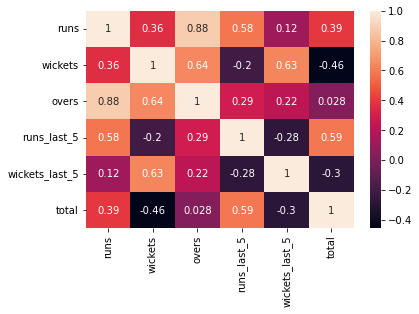

In [49]:
from seaborn import heatmap
heatmap(data=ipl_df.corr(), annot=True)

In [50]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
for col in ['bat_team', 'bowl_team']:
  ipl_df[col] = le.fit_transform(ipl_df[col])
ipl_df.head()

,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,3,6,61,0,5.1,59,0,222
33,3,6,61,1,5.2,59,1,222
34,3,6,61,1,5.3,59,1,222
35,3,6,61,1,5.4,59,1,222
36,3,6,61,1,5.5,58,1,222


In [51]:
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder', 
                                        OneHotEncoder(), 
                                        [0, 1])], 
                                      remainder='passthrough')

In [52]:
ipl_df = np.array(columnTransformer.fit_transform(ipl_df))

In [53]:
cols = ['batting_team_Chennai Super Kings', 'batting_team_Delhi Daredevils', 'batting_team_Kings XI Punjab',
              'batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians', 'batting_team_Rajasthan Royals',
              'batting_team_Royal Challengers Bangalore', 'batting_team_Sunrisers Hyderabad',
              'bowling_team_Chennai Super Kings', 'bowling_team_Delhi Daredevils', 'bowling_team_Kings XI Punjab',
              'bowling_team_Kolkata Knight Riders', 'bowling_team_Mumbai Indians', 'bowling_team_Rajasthan Royals',
              'bowling_team_Royal Challengers Bangalore', 'bowling_team_Sunrisers Hyderabad', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total']
df = pd.DataFrame(ipl_df, columns=cols)

In [54]:
features = df.drop(['total'], axis=1)
labels = df['total']

# Prepare Train and Test Data

In [55]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.20, shuffle=True)
print(f"Training Set : {train_features.shape}\nTesting Set : {test_features.shape}")

Training Set : (32086, 21)
Testing Set : (8022, 21)


In [56]:
models = dict()

# . Decision Tree Regressor

In [57]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
# Train Model
tree.fit(train_features, train_labels)

DecisionTreeRegressor()

In [58]:
train_score_tree = str(tree.score(train_features, train_labels) * 100)
test_score_tree = str(tree.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_tree[:5]}%\nTest Score : {test_score_tree[:5]}%')
models["tree"] = test_score_tree

Train Score : 99.99%
Test Score : 86.09%


# Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
# Train Model
linreg.fit(train_features, train_labels)

LinearRegression()

In [60]:
train_score_linreg = str(linreg.score(train_features, train_labels) * 100)
test_score_linreg = str(linreg.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_linreg[:5]}%\nTest Score : {test_score_linreg[:5]}%')
models["linreg"] = test_score_linreg

Train Score : 65.79%
Test Score : 66.42%


# Random Forest Regression

In [61]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
# Train Model
forest.fit(train_features, train_labels)

RandomForestRegressor()

In [62]:
train_score_forest = str(forest.score(train_features, train_labels)*100)
test_score_forest = str(forest.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_forest[:5]}%\nTest Score : {test_score_forest[:5]}%')


Train Score : 99.08%
Test Score : 93.21%


In [63]:
train_score_forest = str(forest.score(train_features, train_labels)*100)
test_score_forest = str(forest.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_forest[:5]}%\nTest Score : {test_score_forest[:5]}%')
models["forest"] = test_score_forest

Train Score : 99.08%
Test Score : 93.21%


# Best Model

<BarContainer object of 3 artists>

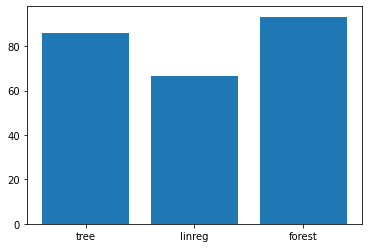

In [64]:
import matplotlib.pyplot as plt 
model_names = list(models.keys())
accuracy = list(map(float, models.values()))
# creating the bar plot
plt.bar(model_names, accuracy)

# Predictions

In [65]:
def score_predict(batting_team, bowling_team, runs, wickets, overs, runs_last_5, wickets_last_5, model=forest):
  prediction_array = []
  # Batting Team
  if batting_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Daredevils':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
  if bowling_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Daredevils':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
  prediction_array = prediction_array + [runs, wickets, overs, runs_last_5, wickets_last_5]
  prediction_array = np.array([prediction_array])
  pred = model.predict(prediction_array)
  return int(round(pred[0]))

# Test 1


In [66]:
batting_team='Delhi Daredevils'
bowling_team='Chennai Super Kings'
score = score_predict(batting_team, bowling_team, overs=10.2, runs=68, wickets=3, runs_last_5=29, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 147')

Predicted Score : 147 || Actual Score : 147


D:\anagonda python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Test 2


In [67]:
batting_team="Kings XI Punjab"
bowling_team="Rajasthan Royals"
score =score_predict(batting_team, bowling_team, overs=14.0, runs=118, wickets=1, runs_last_5=45, wickets_last_5=0)
print(f'Predicted Score : {score} || Actual Score : 185')

Predicted Score : 187 || Actual Score : 185


D:\anagonda python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Test 3


In [68]:
batting_team='Delhi Daredevils'
bowling_team='Mumbai Indians'
score = score_predict(batting_team, bowling_team, overs=18.0, runs=96, wickets=8, runs_last_5=18, wickets_last_5=4)
print(f'Predicted Score : {score} || Actual Score : 110')

Predicted Score : 110 || Actual Score : 110


D:\anagonda python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
